In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Day42/placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


Text(0.5, 1.0, 'Placement exam marks PDF')

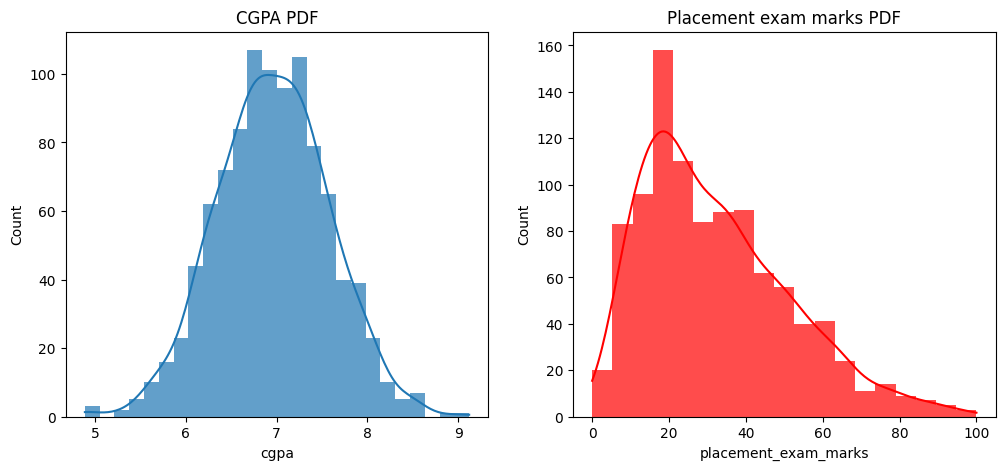

In [10]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True, edgecolor='none', alpha=0.7)
plt.title("CGPA PDF")

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True, color='red', edgecolor='none', alpha=0.7)
plt.title("Placement exam marks PDF")

In [11]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [14]:
print(df['cgpa'].skew())
print("Close to 0, hence near normally distributed")

-0.014529938929314918
Close to 0, hence near normally distributed


In [15]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


### BoxPlot

<Axes: ylabel='placement_exam_marks'>

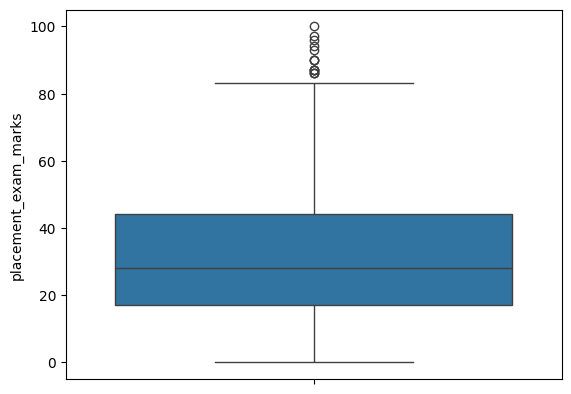

In [17]:
sns.boxplot(df['placement_exam_marks'])

### Calculate IQR

In [18]:
percentiile75 = df['placement_exam_marks'].quantile(0.75)
percentile25 = df['placement_exam_marks'].quantile(0.25)

In [19]:
iqr = percentiile75 - percentile25

### Calculate upper and lower limits

In [20]:
upper_limit = percentiile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [21]:
print("Upper Limit:", upper_limit)
print("Lower Limit:", lower_limit)

Upper Limit: 84.5
Lower Limit: -23.5


### Finding Outliers

In [22]:
df[(df['placement_exam_marks'] < lower_limit) | (df['placement_exam_marks'] > upper_limit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


### Trimming

In [23]:
new_df = df[(df['placement_exam_marks'] < upper_limit)]
new_df.shape

(985, 3)

Text(0.5, 1.0, 'Boxplot after trimming')

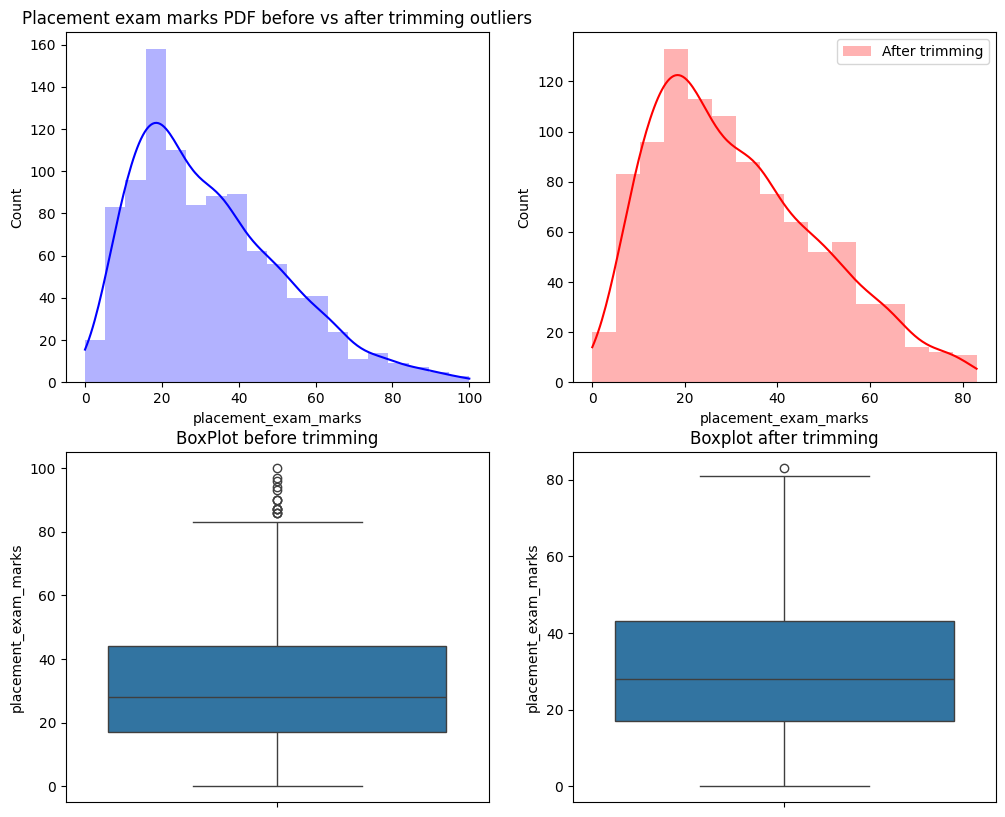

In [34]:
plt.figure(figsize=(12,10))

plt.tight_layout()

plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'], kde=True, color='blue', alpha=0.3, edgecolor='none', label='Before trimming')
plt.title("Placement exam marks PDF before vs after trimming outliers")

plt.subplot(2,2,2)
sns.histplot(new_df['placement_exam_marks'], kde=True, color='red', alpha=0.3, edgecolor='none', label='After trimming')
plt.legend()

plt.subplot(2,2,3)
sns.boxplot(df['placement_exam_marks'])
plt.title("BoxPlot before trimming")

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])
plt.title("Boxplot after trimming")

### Capping

In [43]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [46]:
new_df_cap.shape

(1000, 3)

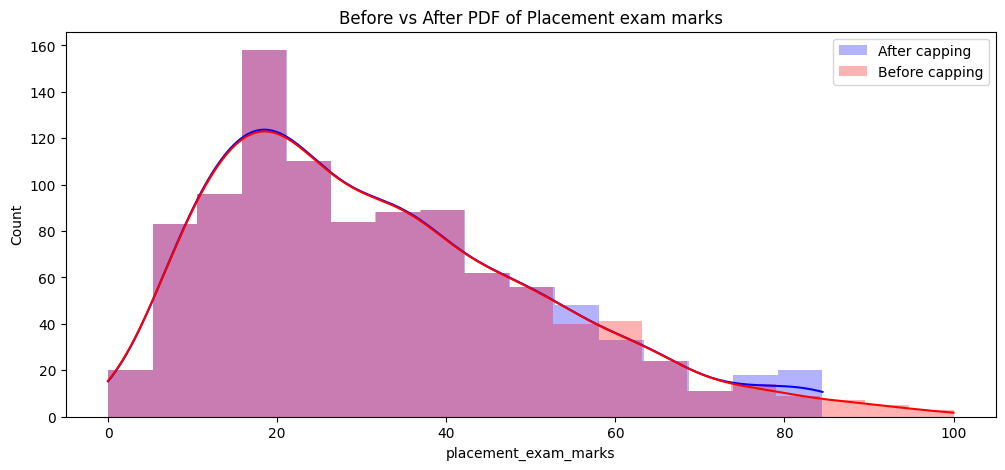

In [48]:
plt.figure(figsize=(12,5))

sns.histplot(new_df_cap['placement_exam_marks'], kde=True, color='blue', edgecolor='none', label='After capping', alpha=0.3)
sns.histplot(df['placement_exam_marks'], kde=True, color='red', edgecolor='none', label='Before capping', alpha=0.3)
plt.title("Before vs After PDF of Placement exam marks")
plt.legend()